In [ ]:
# 信用卡盗刷一般发生在持卡人信息被不法分子窃取后复制卡片进行消费或信用卡被他人冒领后激活消费的情况。一旦发生信用卡盗刷，持卡人和银行都会蒙受一定的经济损失。因此，通过大数据搭建金融反欺诈模型对银行来说尤为重要。

   换设备次数  支付失败次数  换IP次数  换IP国次数   交易金额  欺诈标签
0      0      11      3       5  28836     1
1      5       6      1       4  21966     1
2      6       2      0       0  18199     1
3      5       8      2       2  24803     1
4      7      10      5       0  26277     1
[0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1
 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0
 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1
 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0]
实际值
 [0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0
 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1
 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1
 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1
 1 1 1 1 0 0 0 0 0

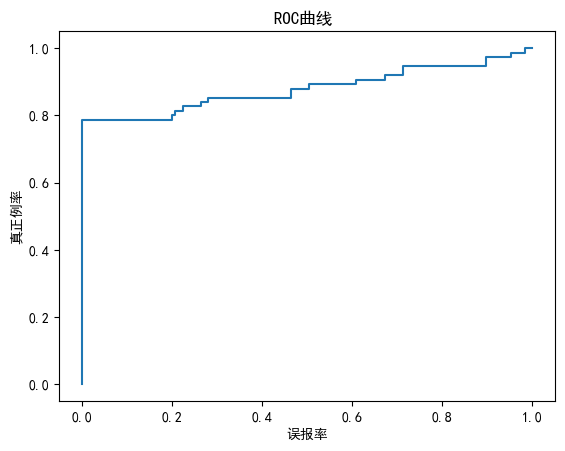

AUC值
 0.8794666666666666
[0.3710549  0.17622714 0.08449922 0.31922698 0.04899174]


In [9]:
from sklearn.metrics import roc_curve, auc
# 1、读取数据：信用卡交易数据.xlsx (5分)
import  pandas as pd
import numpy as ny
a1=pd.read_excel("E:///python代码/lxrk/data/day12/信用卡交易数据.xlsx")
# 2、查看前5行(5分)
print(a1.head(5))

# 3、将特征变量和目标变量单独提取出来(5分)
# 特征变量
x=a1.iloc[:,:-1]
# # 目标变量
y=a1['欺诈标签']
# 4、划分训练集和测试集(5分)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0)
# 5、引入XGBoost分类器进行模型训练(5分)
# from xgboost import XGBClassifier
from xgboost import XGBClassifier
bst  = XGBClassifier()#n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
bst.fit(X_train,y_train)
# 6、预测测试集数据(5分)
yc = bst.predict(X_test)
# 7、打印预测结果(5分)
print(yc)
# 8、将预测值和实际值进行对比(5分)
print("实际值\n",y_test.values)
print("预测值\n",yc)
# 9、可以通过XGBClassifier()自带的score()函数来查看模型预测的准确度评分（10分）
zq=bst.score(X_test, y_test)
print("模型预测的准确度评\n",zq)
# 10、XGBClassifier分类器本质预测的并不是准确的0或1的分类，而是预测其属于某一分类的概率，可以通过predict_proba()函数查看预测属于各个分类的概率（10分）
gl=bst.predict_proba(X_test)
print("预测属于各个分类的概率",gl)
# 11、查看欺诈（分类为1）的概率（10分）
zpgl=gl[:,1]
print("查看欺诈（分类为1）的概率",zpgl)
# 12、绘制ROC曲线来评估模型预测的效果（10分）\

import matplotlib.pyplot as plt
# 让图片中可以显示中文
plt.rcParams['font.sans-serif'] = 'SimHei'
# 让图片中可以显示负号
plt.rcParams['axes.unicode_minus'] = False
误报率,真正例率,临界点=roc_curve(y_test, zpgl)
plt.plot(误报率,真正例率)
#设置 x 轴的标签。

plt.xlabel("误报率")
#设置 y 轴的标签。
plt.ylabel("真正例率")
plt.title("ROC曲线 ")#标题
plt.show()
# 13、求出模型的AUC值（10分）
AUC值=auc(误报率,真正例率)
print("AUC值\n",AUC值)
# 14、通过查看各个特征的特征重要性(feature importance)来得出信用卡欺诈行为判断中最重要的特征变量（10分）
zyx=bst.feature_importances_
print("最重要的特征变量",zyx)
